# Домашнее задание 1

__Оценки-баллы__: 
- 1: 1-2
- 2: 3-6
- 3: 7-9
- 4: 10-13
- 5: 14-16
- 6: 17-19
- 7: 20-22
- 8: 23-26
- 9: 27-29
- 10: 30-32

__Литература__: 

- 1) An Introduction to Statistical Learning - облегченная версия следующей книги с небольшим количеством матана, примеры реализованы на R. Электронная версия книги - бесплатная: http://faculty.marshall.usc.edu/gareth-james/

По этой книге также есть онлайн-курс от Стенфорда

- 2)The Elements of Statistical Learning - полный классический учебник по статистическому обучению, много математики. Книга, кстати, тоже бесплатна для скачивания: https://web.stanford.edu/~hastie/ElemStatLearn//


__DL (срок сдачи ДЗ)__: 15.10.2021 23:59. После этого срока работы НЕ будут приниматься

__Формат сдачи - в личный аккаунт telegram: @zhuikov_vv__: hw1_3_ivanov_i_i.ipynb

### Описательные статистики

In [449]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('classic')
%matplotlib inline 

Подгрузим данные и посмотрим на первые пять строчек из таблицы.

In [450]:
df = pd.read_csv('./vk_main.csv', sep='\t')
df.head()

,city,country,first_name,home_town,in_hse_memes_group,is_bmm,is_closed,last_name,likes_memes,uid,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
0,Москва,Россия,Александра,Москва,True,True,False,Абашкова,60.0,182152789,...,1.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,42.0,0.428571
1,Рязань,Россия,Анастасия,Рязань,True,True,False,Чуфистова,0.0,148020433,...,2.375000,2.0,1.0,0.105263,0.0,0.0,0.0,0.0,32.0,0.281250
2,Москва,Россия,Александр,Омск,False,True,False,Головачев,0.0,138413935,...,1.400000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,32.0,0.406250
3,NaN,NaN,Анна,NaN,False,True,False,Лобанова,0.0,366261055,...,4.166667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,45.0,0.333333
4,NaN,Россия,Алексей,NaN,True,True,False,Пузырный,21.0,111252392,...,3.181818,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,41.0,0.341463


#### Задание 1 [2]

В переменной `wall_text` лежат тексты со стен всех пользователей.

* Постройте распределение длин для всех стен. 
* Сколько людей написали на своей стенке хотя бы раз название своего вуза?


In [451]:
df.wall_text.head()

0         Давай поговорим о личном   Буду вашим кот...
1        Лучший фотограф😻😻        ой,  может даже у...
2    🚀 [id18115779|Баха], спасибо за атмосферу 🌌 \n...
3    Не проходите мимо! Приходите к нам! Ждём всех!...
4    Нам пора признать, что зимний сезон следует сд...
Name: wall_text, dtype: object

##### Распределение длин для всех стен

In [452]:
# Можно посчитать длину самим или воспользоваться 'wall_text_len_cnt'
# wall_text_len = df.wall_text.apply(lambda x: len(str(x)))

<AxesSubplot:>

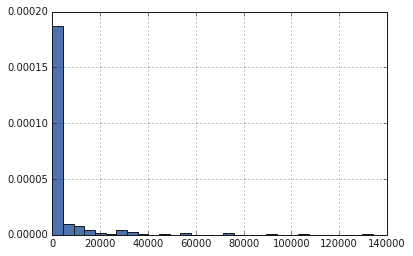

In [453]:
df.wall_text_len_cnt.hist(bins=30, density=True)

<AxesSubplot:ylabel='Density'>

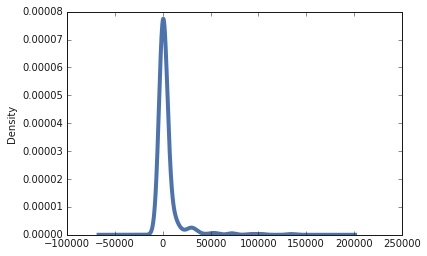

In [454]:
df.wall_text_len_cnt.plot(kind='kde', linewidth=4)

##### Сколько людей написали на своей стенке хотя бы раз название своего вуза?

In [455]:
# В этой табличке лежат данные по профилю человека
df_profile = pd.read_csv('./vk_data_profile.csv',sep='\t')

# Мерджим таблички по uid
df_combo = pd.merge(df, df_profile, on="uid")

# Проверять университет будем по полному названию, либо названию из скобок
# Например, если вуз НИУ ВШЭ (ТЕСТ), то будет учитываться НИУ ВШЭ или ТЕСТ
def wall_contains_university(tuple):
    wall_text = str(tuple[1]['wall_text'])
    university_names = str(tuple[1]['university_str']).split(' (')
    university_names = list(map(lambda x: x.replace(')', ''), university_names))
    
    for name in university_names:
        if name in wall_text: 
            return True

    return False

university_on_wall_text = [i for i in df_combo[df_combo.university_str.notnull()].iterrows() if wall_contains_university(i)]
'Количество людей, которые упоминали вуз на стене равно {0}'.format(len(university_on_wall_text))

'Количество людей, которые упоминали вуз на стене равно 1'

#### Задание 2 [1]

Вывести имена самых больших любителей мемов (топ 1\% значений по колонке `likes_memes`. Итоговую табличку отсортировать по числу оставленных в группе лайков.

In [456]:
top_1_memes = df.sort_values('likes_memes', ascending=False).head(int(df.shape[0] / 100))
list((top_1_memes.first_name + ' ' + top_1_memes.last_name).values)

['Полина Андреева', 'Николь Пименова', 'Александр Поляков', 'Данил Астапов']

#### Задание 3 [1]

Построить гистограммы для параметров `wall_emoji_cnt` (число эмодзи на стене у человека) и `wall_comment_cnt` (число коментов на стене у человека). Где больше выбросов?

<AxesSubplot:>

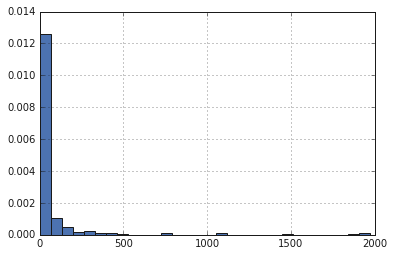

In [457]:
df.wall_emoji_cnt.hist(bins=30, density=True)

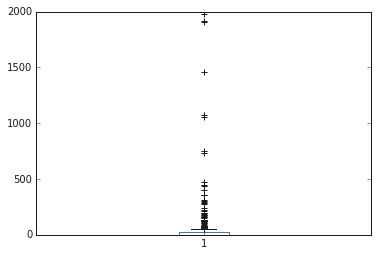

In [458]:
wall_emoji_cnt = df[df.wall_emoji_cnt.notnull()].wall_emoji_cnt

plt.boxplot(wall_emoji_cnt)
plt.show()

<AxesSubplot:>

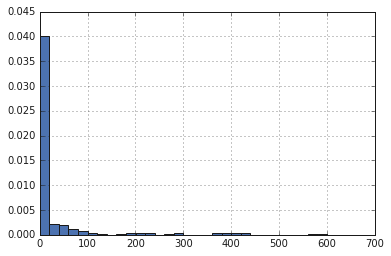

In [459]:
df.wall_comment_cnt.hist(bins=30, density=True)

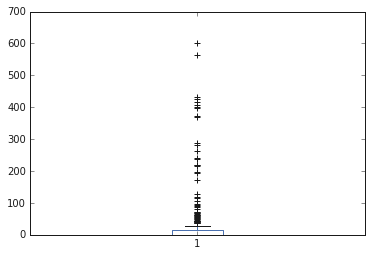

In [460]:
wall_comment_cnt = df[df.wall_comment_cnt.notnull()].wall_comment_cnt

plt.boxplot(wall_comment_cnt)
plt.show()

Исходя из графиков видно, что больше выбросов у `wall_comment_cnt`.

Сравните для обоих показателей средние с медианами. Какие выводы о хвостах распределений и выборосах можно сделать из этого сравнения?

In [461]:
wall_emoji_cnt.describe()

count     343.000000
mean       62.909621
std       226.657483
min         0.000000
25%         0.000000
50%         2.000000
75%        21.500000
max      1975.000000
Name: wall_emoji_cnt, dtype: float64

In [462]:
wall_comment_cnt.describe()

count    343.000000
mean      29.632653
std       84.781448
min        0.000000
25%        0.000000
50%        0.000000
75%       14.000000
max      601.000000
Name: wall_comment_cnt, dtype: float64

Средние очень сильно отличаются от медиан, что говорит о влиянии хвостов и выбросов.

#### Задание 4 [1]

Посчитайте соотношение полов в направлениях по маркетингу и менеджменту (`is_bmm` - с маркетинга - $1$, с менеджмента - $0$). Проинтерпретируйте итоговые показатели. Где больше парней? Во сколько раз? 

0.44642857142857145
1.228813559322034


([<matplotlib.axis.XTick at 0x12b3d8280>,
 [Text(0, 0, '♂ marketing'),
  Text(1, 0, '♀ marketing'),
  Text(2, 0, '♂ management'),
  Text(3, 0, '♀ management')])

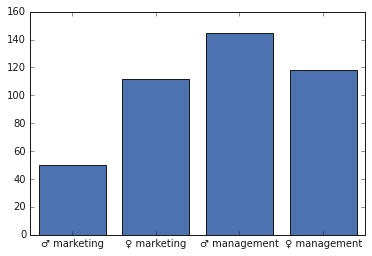

In [463]:
import numpy as np

df_male_marketing = df[(df.male_dummy == 1) & (df.is_bmm == True)].shape[0]
df_female_marketing = df[(df.male_dummy == 0) & (df.is_bmm == True)].shape[0]

df_male_management = df[(df.male_dummy == 1) & (df.is_bmm == False)].shape[0]
df_female_management = df[(df.male_dummy == 0) & (df.is_bmm == False)].shape[0]

print(df_male_marketing / df_female_marketing)
print(df_male_management / df_female_management)

x = np.arange(4)
plt.bar(x, height=[df_male_marketing, df_female_marketing, df_male_management, df_female_management])
plt.xticks(x, ['♂ marketing', '♀ marketing', '♂ management', '♀ management'])

Парней на менеджементе больше чем девушек в 1.2 раза.

#### Задание 5 [2]

Каждый студент добавляет к себе в друзья людей со своего потока. В переменной `friends_mail_from_course_pct` записана доля парней-друзей с потока (то, что переменная называется не `male` - опечатка).

Постройте гистограмму для распределения доли парней в друзьях для девушек и для парней. Обе гистограммы постройте на одной картинке. 

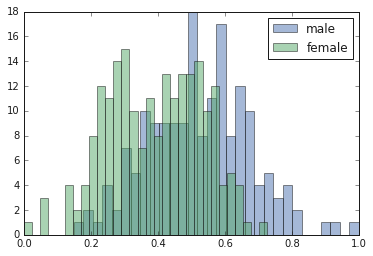

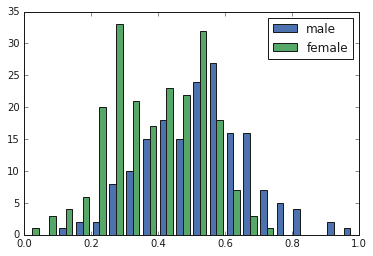

In [464]:
df_males = df[df.male_dummy == 1]
df_females = df[df.male_dummy == 0]

plt.hist(df_males.friends_mail_from_course_pct, bins=30, alpha=0.5, label='male')
plt.hist(df_females.friends_mail_from_course_pct, bins=30, alpha=0.5, label='female')

plt.legend(loc='upper right')
plt.show()

plt.hist([df_males.friends_mail_from_course_pct, df_females.friends_mail_from_course_pct], bins=20, label=['male', 'female'])
plt.legend(loc='upper right')

plt.show()

Посчитайте для обеих групп среднее и дисперсию. Какие выводы вы можете сделать на основе посчитанных статистик?

In [465]:
males_mean = df_males.friends_mail_from_course_pct.mean()
males_std = df_males.friends_mail_from_course_pct.std()

females_mean = df_females.friends_mail_from_course_pct.mean()
females_std = df_females.friends_mail_from_course_pct.std()

print('males_mean = {0}\nfemales_mean = {1}\nmales_std = {2}\nfemales_std = 3'.format(males_mean, females_mean, males_std**2, females_std**2))

males_mean = 0.5230066008581026
females_mean = 0.3915219303663434
males_std = 0.023496754227746396
females_std = 3


У парней дисперсия меньше, большинство значений находится ближе к среднему, что мы и видим на диаграмме.

#### Задание 6 [3]

Давайте проанализируем колонку со средним кол-во фото в месяц (`photo_month_mean`)

* Постройте на одной картинке гистограмы для распределения этого показателя по разным полам. 
* Правда ли, что типичная девушка выкладывает значительно больше фотографий, чем типичный мужчина? (подумайте какой именно показатель типичности нужно выбрать для сравнения и обоснуйте почему)
* Для какого пола показатель оказывается более непредсказуемым? (подумайте как именно корректно эту непредсказуемость оценить, обычное стандартное отклонение явно не подходит)

Не забывайте подгрузить пакет `matplotlib`!  Все свои рассуждения пишите прямо по ходу кода

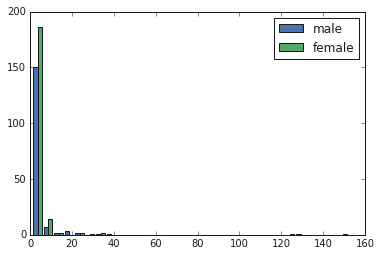

In [466]:
plt.hist([df_males.photo_month_mean, df_females.photo_month_mean], bins=30, label=['male', 'female'])
plt.legend(loc='upper right')

In [467]:
df_males.photo_month_mean.describe()

count    167.000000
mean       4.040629
std       11.327306
min        1.000000
25%        1.000000
50%        1.500000
75%        2.683333
max      131.416667
Name: photo_month_mean, dtype: float64

In [468]:
df_females.photo_month_mean.describe()

count    209.000000
mean       4.453513
std       14.076101
min        1.000000
25%        1.000000
50%        1.750000
75%        3.333333
max      151.833333
Name: photo_month_mean, dtype: float64

##### Правда ли, что типичная девушка выкладывает значительно больше фотографий, чем типичный мужчина?

Типычных девушек большинство, поэтому, например, можно посмотреть на 75% квартиль, у девушек он больше, то есть девушки выкладывают больше фотографий.

##### Для какого пола показатель оказывается более непредсказуемым?

У девушек и парней схожи статистические показатели, но девушек больше. Кажется, что поэтому у девушек более предсказуемый показатель.

### Визуализация

У всех нас есть датасет по контакту. В нём лежит информация про всех нас. Эту информацию надо как следует проанализировать. 

В большинстве заданий для получения баллов придётся не только завести код, но и написать свои мысли в поле Ответ. Сочинения надо писать прямо в текстовых ячейках, сразу после слова Ответ.

Для начала подгрузите все необходимые библиотеки: math, numpy, pandas, matplotlib.pyplot, seaborn и включите опцию, отвечающую за прорисовку картинок прямо в тетрадке.

In [469]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Подгрузите данные профилей и данные по фотографиям

In [470]:
# В этой табличке лежат данные по профилю человека
df_profile = pd.read_csv('./vk_data_profile.csv',sep='\t')

# В этой табличке лежат данные по фотографиям человека
df_photo = pd.read_csv('./vk_data_photo.csv',sep='\t')

Склеим табличку по полю uid

In [471]:
df = pd.merge(df_profile, df_photo, how='right', on='uid')
df.head()

,Unnamed: 0_x,uid,Unnamed: 0.1,first_name,last_name,is_closed,city,home_town,male_dummy,relation_cat,...,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text,photo_text_len_cnt,photo_yer_mean,vk_photo_ava_change_cnt,vk_photo_text_url_len_cnt,vk_photo_wall_ph_post_cnt
0,0,182152789,0,Александра,Абашкова,False,Москва,Москва,0,не указано,...,0.0,0.0,0.000000,0.0,,0.0,1.333333,0.0,0.0,0.0
1,1,148020433,1,Анастасия,Чуфистова,False,Рязань,Рязань,0,не указано,...,2.0,1.0,0.105263,0.0,,0.0,3.166667,0.0,0.0,0.0
2,2,138413935,2,Александр,Головачев,False,Москва,Омск,1,не женат/не замужем,...,0.0,0.0,0.000000,0.0,,0.0,2.333333,0.0,0.0,0.0
3,3,366261055,3,Анна,Лобанова,False,NaN,NaN,0,не указано,...,0.0,0.0,0.000000,0.0,,0.0,12.500000,0.0,0.0,0.0
4,4,111252392,4,Алексей,Пузырный,False,NaN,NaN,1,NaN,...,0.0,0.0,0.000000,0.0,,0.0,8.750000,0.0,0.0,0.0


Давайте посмотрим на все названия колонок, которые есть в таблице.

In [472]:
df.columns

Index(['Unnamed: 0_x', 'uid', 'Unnamed: 0.1', 'first_name', 'last_name',
       'is_closed', 'city', 'home_town', 'male_dummy', 'relation_cat',
       'relation_partner', 'byear', 'bmonth', 'bday', 'country',
       'facebook_dummy', 'instagram_dummy', 'skype_dummy', 'twitter_dummy',
       'home_phone_dummy', 'mobile_phone_dummy', 'site_dummy', 'folowers_cnt',
       'university_str', 'faculty_str', 'about_str', 'activities_str',
       'books_str', 'interests_str', 'movies_str', 'music_str', 'quotes_str',
       'tv_str', 'games_str', 'can_post_dummy', 'can_see_all_posts_dummy',
       'can_see_audio_dummy', 'can_write_private_message_dummy',
       'has_mobile_dummy', 'has_ava_dummy', 'wall_comments_dummy',
       'albums_cnt', 'audio_cnt', 'followers_cnt', 'friends_cnt', 'gifts_cnt',
       'groups_cnt', 'mutual_friends_cnt', 'photos_cnt', 'subscriptions_cnt',
       'user_photos_cnt', 'videos_cnt', 'pages_cnt', 'alco_love_cat',
       'smoke_love_cat', 'religion_str', 'inspired_by

Мы видим, что часть из них кончается на `cnt`. Это колонки-счётчики. В них лежат такие переменные как количество фоток, лайков, репостов и тд

In [473]:
variables_cnt = [item for item in df.columns if item[-3:] == 'cnt']
variables_cnt

['folowers_cnt',
 'albums_cnt',
 'audio_cnt',
 'followers_cnt',
 'friends_cnt',
 'gifts_cnt',
 'groups_cnt',
 'mutual_friends_cnt',
 'photos_cnt',
 'subscriptions_cnt',
 'user_photos_cnt',
 'videos_cnt',
 'pages_cnt',
 'lang_cnt',
 'change_city_school_cnt',
 'schools_cnt',
 'photo_cnt',
 'photo_like_cnt',
 'photo_repost_cnt',
 'photo_text_len_cnt',
 'vk_photo_ava_change_cnt',
 'vk_photo_text_url_len_cnt',
 'vk_photo_wall_ph_post_cnt']

Разбиритесь как работает и устроен этот цикл, если вы ещё не разбираетесь. Почитать об этом можно [вот тут.](https://habr.com/ru/post/30232/) Чуть ниже вам предстоит написать свой такой. 

#### Задание 7 [2]

Вытащите из переменных счётчиков только те, которые отвечают за фото.__ Постройте для них гистограммы (для удобства используйте логарифмическое скалирование). Как думаете, в каких переменных есть выбросы? Какие из переменных неинформативны? Почему?


__Ответ:__ Выбросы видно на `photo_cnt`, `photo_like_cnt`, `vk_photo_text_url_len_cnt`. Неинформативны `vk_photo_ava_change_count`, `vk_photo_wall_ph_post_cnt`

In [474]:
photos_var_cnt = ['user_photos_cnt', 'photo_cnt', 'photo_like_cnt', 'photo_repost_cnt', 'photo_text_len_cnt', 'vk_photo_ava_change_cnt', 'vk_photo_text_url_len_cnt', 'vk_photo_wall_ph_post_cnt']

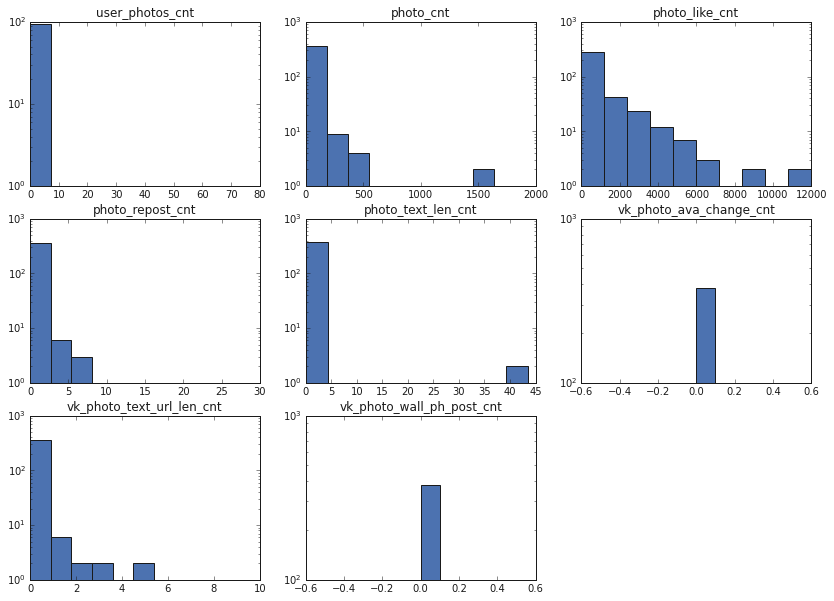

In [475]:
plt.figure(figsize=(14, 10))

rows = math.ceil(len(photos_var_cnt) / 3)
for index, cnt_name in enumerate(photos_var_cnt):
    plt.subplot(rows, 3, index + 1)
    plt.hist(df[cnt_name], log=True,)
    plt.title(cnt_name)

plt.show()

#### Задание 8 [2]

Кто больше постит фотографий, девушки или парни? чьи фото собирают больше лайков? (общее количество лайков, медиана и среднее)

Вы уже до этого искали ответы на подобные вопросы. Тут от вас требуется построить картинку, на которй будет чётко видно что происходит с женщинами, а что с мужчинами (своя гистограмма для каждой фичи раскрашенная по мужчинам и женщинам). Попробуйте построить все $4$ картинки в рамках одной с помощью `axis`.

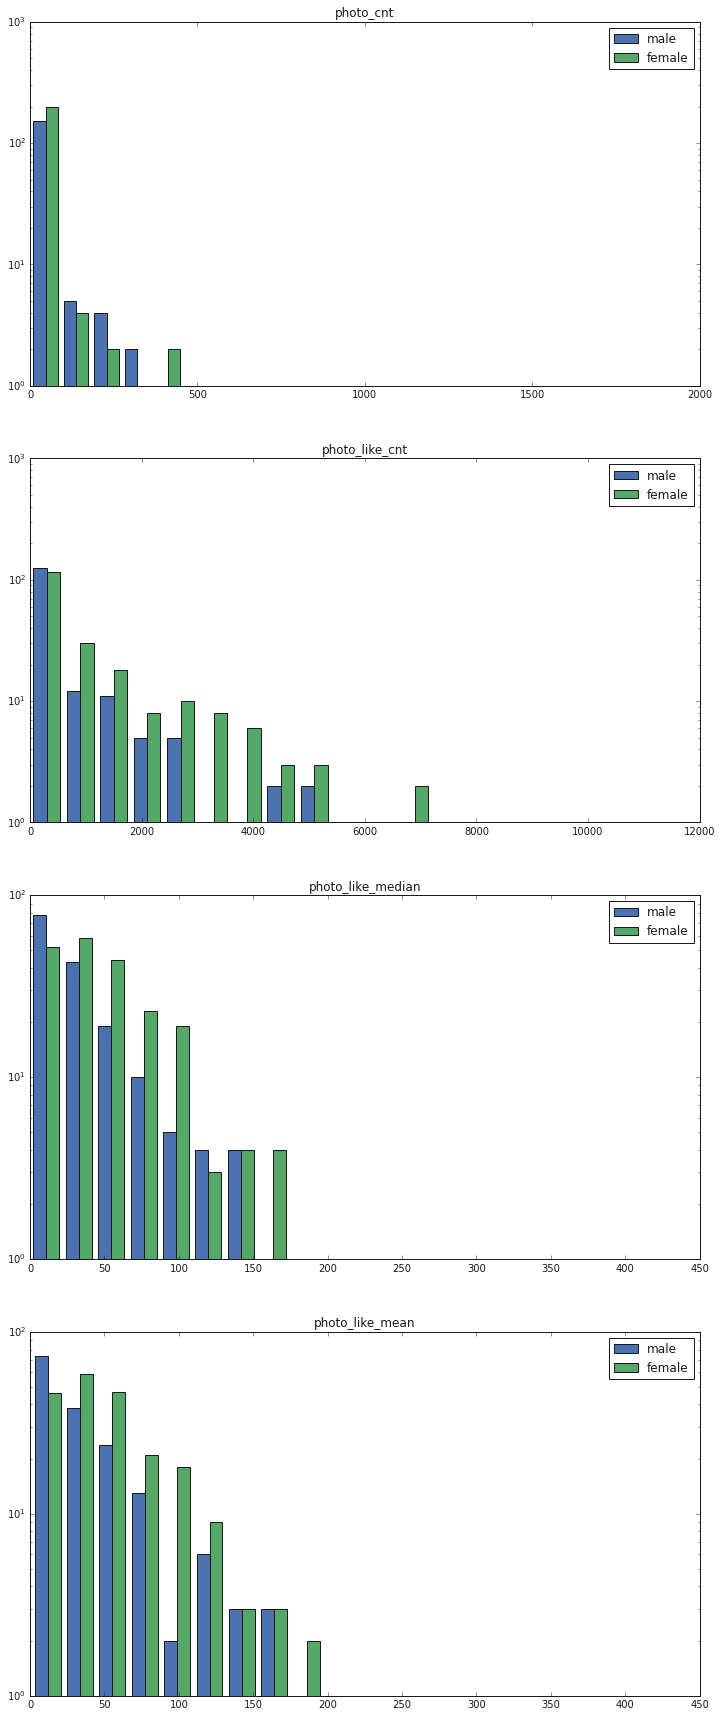

In [476]:
df_males = df[df.male_dummy == 1]
df_females = df[df.male_dummy == 0]

plt.figure(figsize=(12, 30))

plt.subplot(4, 1, 1)
plt.hist([df_males.photo_cnt, df_females.photo_cnt], log=True, bins=20, label=['male', 'female'])
plt.legend(loc='upper right')
plt.title('photo_cnt')

plt.subplot(4, 1, 2)
plt.hist([df_males.photo_like_cnt, df_females.photo_like_cnt], log=True, bins=20, label=['male', 'female'])
plt.legend(loc='upper right')
plt.title('photo_like_cnt')

plt.subplot(4, 1, 3)
plt.hist([df_males.photo_like_median, df_females.photo_like_median], log=True, bins=20, label=['male', 'female'])
plt.legend(loc='upper right')
plt.title('photo_like_median')

plt.subplot(4, 1, 4)
plt.hist([df_males.photo_like_mean, df_females.photo_like_mean], log=True, bins=20, label=['male', 'female'])
plt.legend(loc='upper right')
plt.title('photo_like_mean')

plt.show()

По графикам видно, что и постят женщины больше, и лайков собирают больше

Давайте добавим к нашим переменным (описывающим фотографии) количество друзей, количество подарков и пол

In [477]:
photos_var_cnt = ['photo_cnt', 'photo_like_cnt', 'photo_like_median', 'photo_like_mean']
vars_interesting = photos_var_cnt + ['male_dummy', 'friends_cnt', 'gifts_cnt']

In [478]:
df[vars_interesting].head()

,photo_cnt,photo_like_cnt,photo_like_median,photo_like_mean,male_dummy,friends_cnt,gifts_cnt
0,4.0,309.0,72.0,77.250000,0,298.0,NaN
1,19.0,2894.0,152.0,152.315789,0,408.0,203.0
2,7.0,2406.0,328.0,343.714286,1,2969.0,NaN
3,50.0,1310.0,25.0,26.200000,0,214.0,24.0
4,35.0,1375.0,19.0,39.285714,1,336.0,227.0


#### Задание 9 [2]

Визуализируйте вытащенные признаки попарно. Постройте `pairplot` для всех пар. На диагонали расположите оценки плотностей для признаков. Для этого используйте опцию `diag_kind = 'kde'`. С помощью параметра `hue` разбейте все наблюдения на мужские и женские, чтобы они отражались на картинках разными цветами.

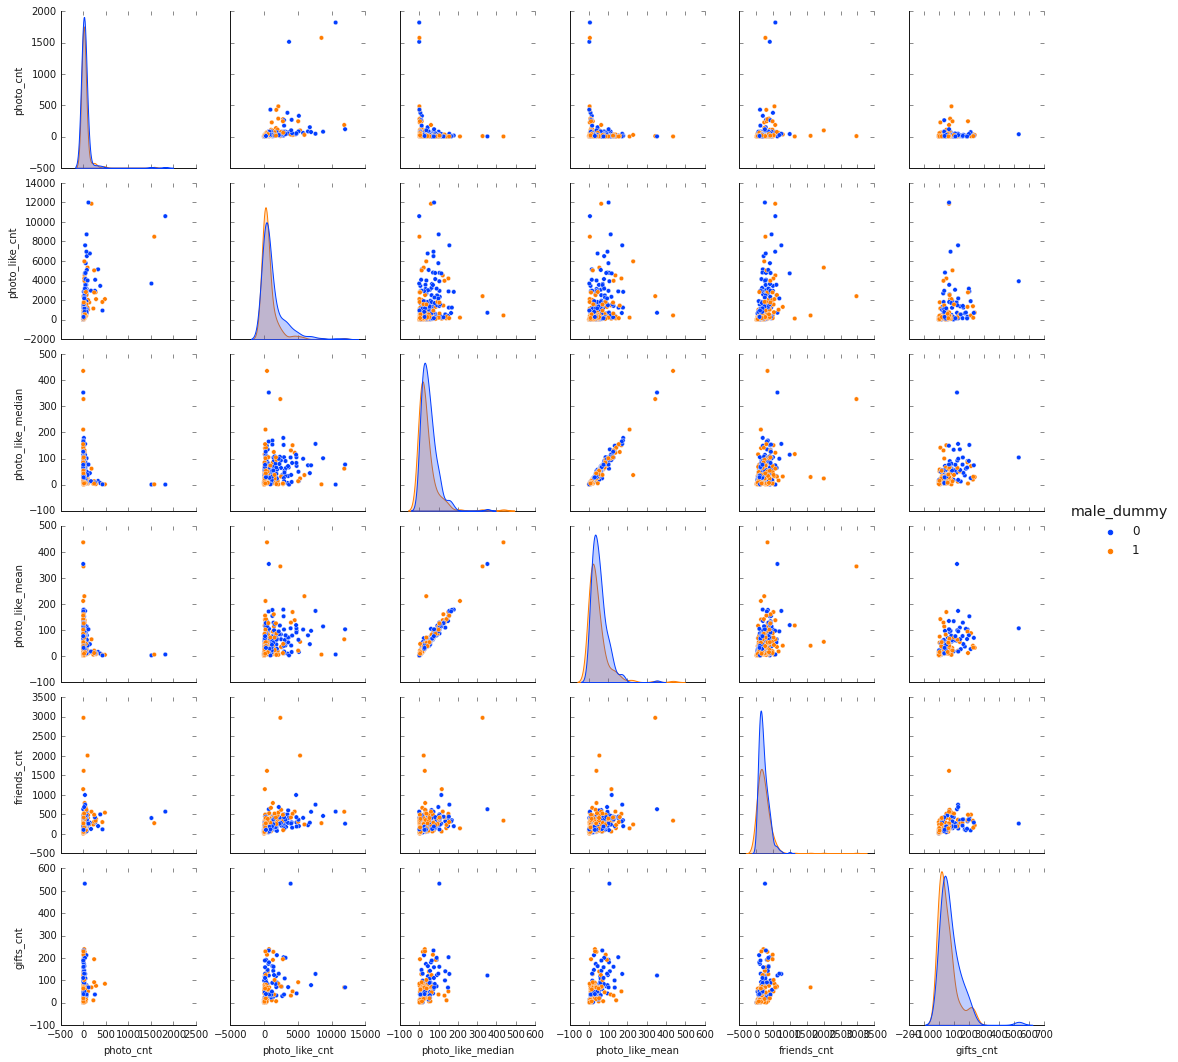

In [479]:
sns.pairplot(df[vars_interesting], hue = 'male_dummy', height = 2.5, diag_kind = 'kde', palette = 'bright');

Давайте для удобства визуализации прологарифмуем наш датасет (предварительно заполнив пропуски нулями или выкинув их)

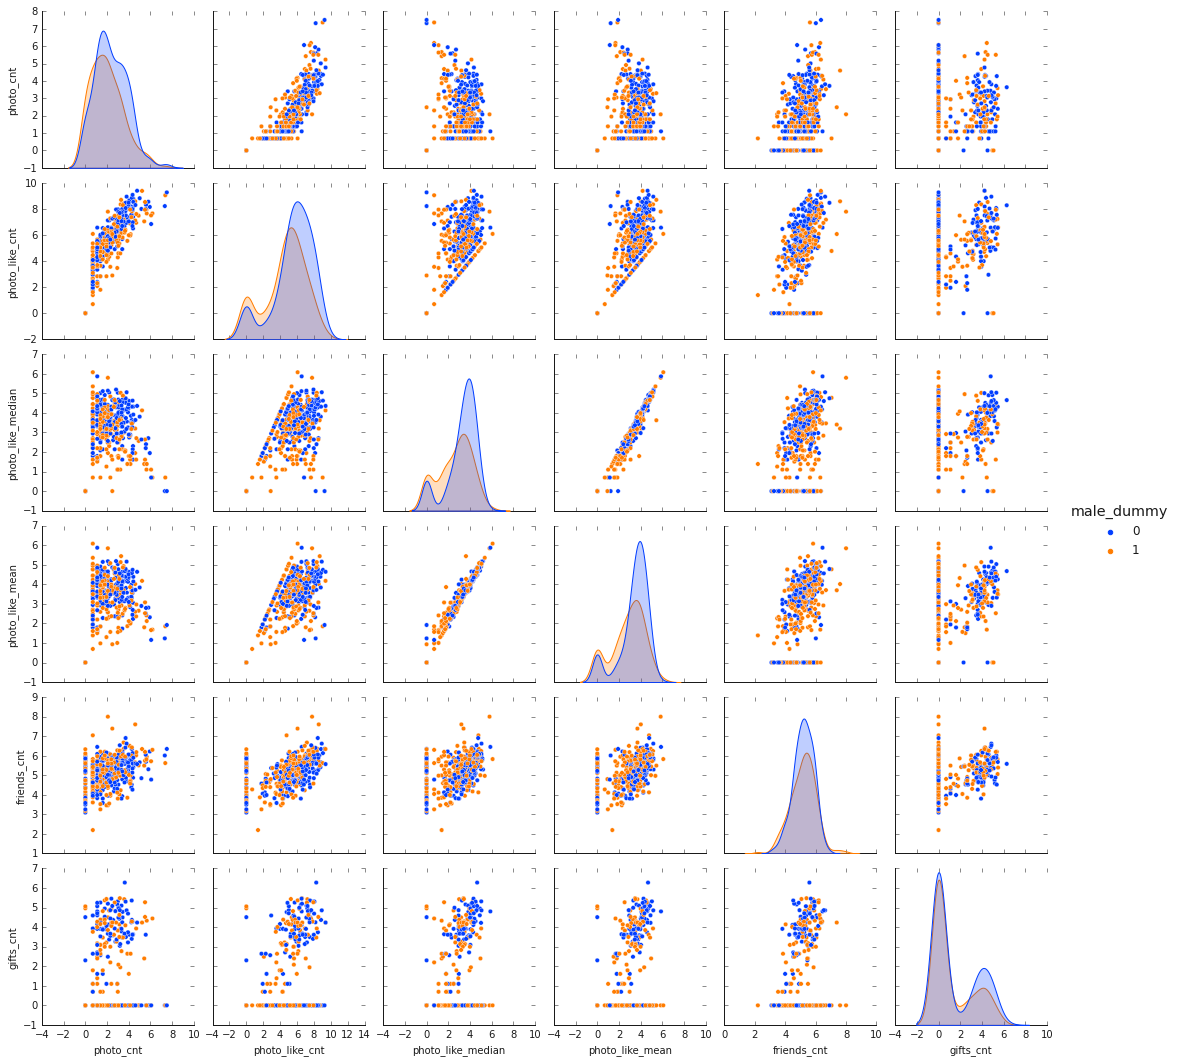

In [480]:
df_na_zero = df[vars_interesting].fillna(0)

for column in df_na_zero.columns:
    if column == 'male_dummy':
        continue
    df_na_zero[column] = df_na_zero[column].map(lambda x: math.log(1 + x))
    

sns.pairplot(df_na_zero[vars_interesting], hue = 'male_dummy', height = 2.5, diag_kind = 'kde', palette = 'bright');

#### Задание 10 [1]

Сделайте датасет df_na_drop. Для этого проделайте всё то же самое, что выше, но вместо того, чтобы заполнять пропуски нулями - выбросите их.

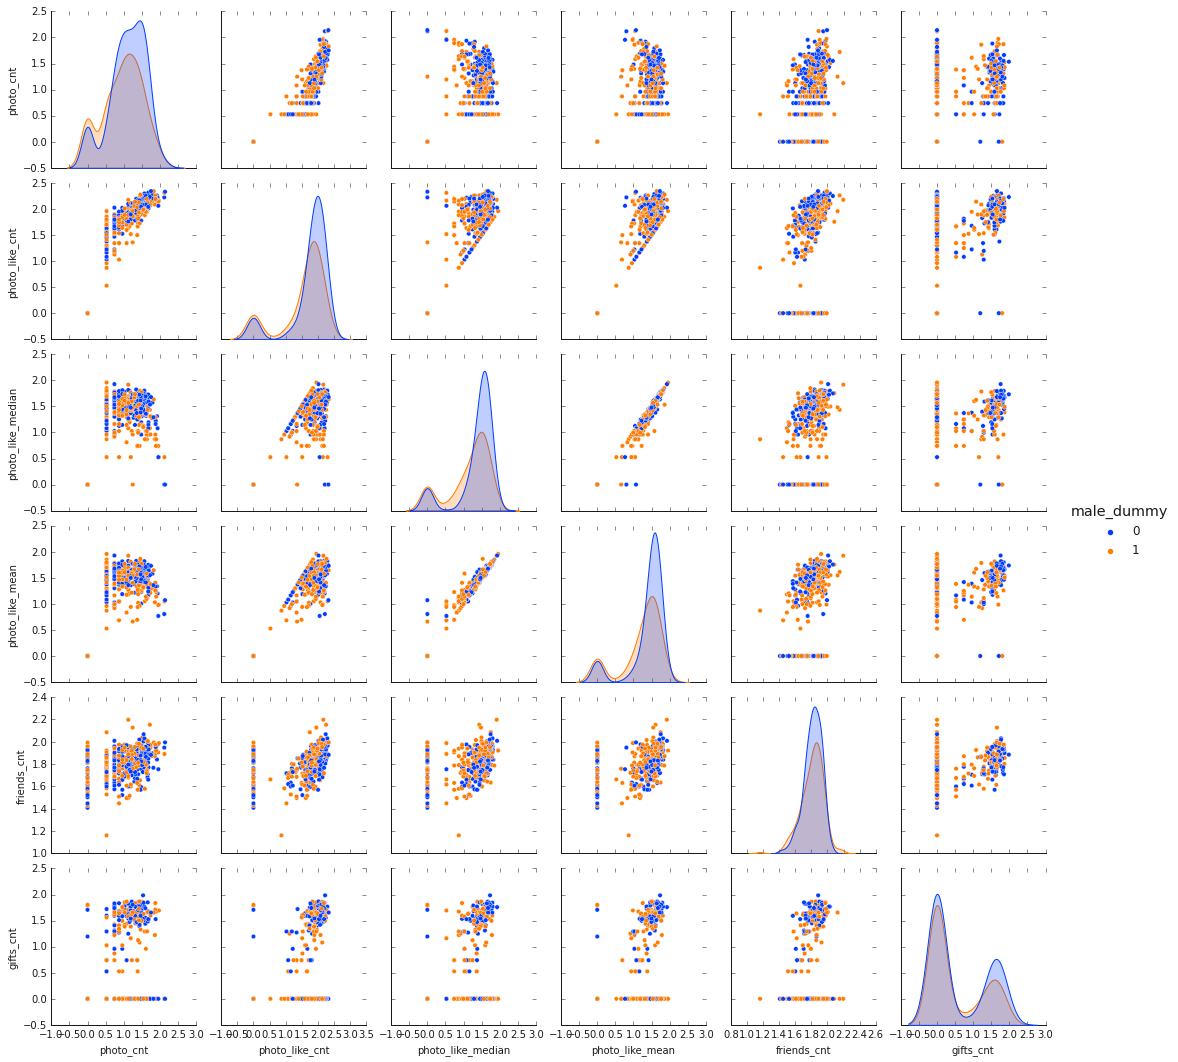

In [481]:
df_na_drop = df.dropna(subset=vars_interesting)

for column in df_na_zero.columns:
    if column == 'male_dummy':
        continue
    df_na_zero[column] = df_na_zero[column].map(lambda x: math.log(1 + x))
    
sns.pairplot(df_na_zero[vars_interesting], hue = 'male_dummy', height = 2.5, diag_kind = 'kde', palette = 'bright');

#### Задание 11 [3]

Дайте ответы на следущие вопросы. Свои мысли пишите прямо здесь! 

* Между какими признаками скорее всего есть линейная зависимость? Почему вы так решили? 

__Ответ:__ `photo_like_mean` и `photo_like_median`.

* Eсть ли тут нелинейные зависимости?

__Ответ:__ `photo_cnt` и `photo_like_cnt`, `photo_like_cnt` и `friends_cnt`.

* Есть ли объекты-выбросы, которые наблюдаются далеко от сгустков из точек. 

__Ответ:__ В `gifts_cnt` отчетливо видно сильный выбросы. 

* Какие ещё интересные особенности вы видите на картинке?

__Ответ:__ Видно, что `photo_like_cnt` зависит от `photo_cnt` и от `friends_cnt`.



#### Задание 12 [2]

Отлично! Половина домашки осталась позади. Давайте теперь для тех же самых признаков построим матрицу корреляций и провизуализируем её с помощью `heatmap`.

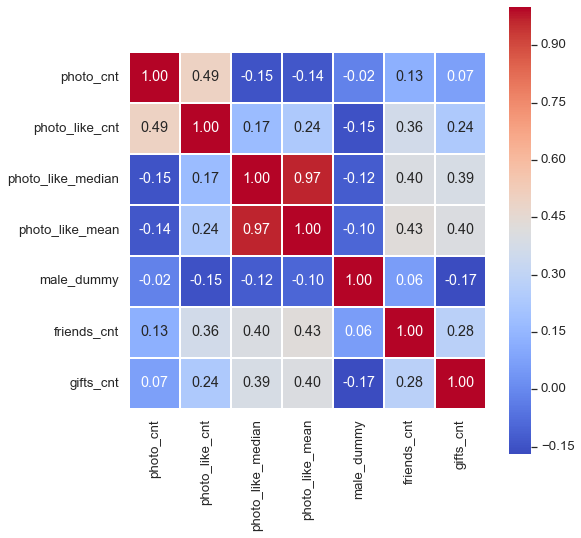

In [482]:
sns.set(font_scale=1.2)
plt.subplots(figsize=(8, 8))
sns.heatmap(df[vars_interesting].corr(method='pearson'),
            square = True, 
            annot = True, 
            fmt=".2f", 
            linewidths=0.1, 
            cmap="coolwarm");

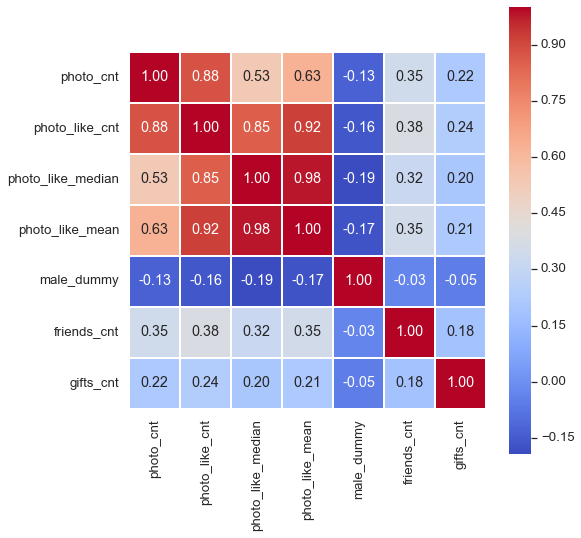

In [406]:
plt.subplots(figsize=(8, 8))
sns.heatmap(df_na_zero[vars_interesting].corr(method='pearson'),
            square = True, 
            annot = True, 
            fmt=".2f", 
            linewidths=0.1, 
            cmap="coolwarm");

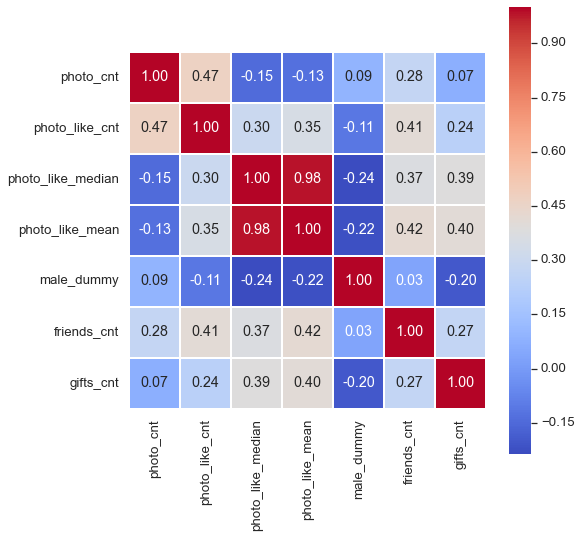

In [407]:
plt.subplots(figsize=(8, 8))
sns.heatmap(df_na_drop[vars_interesting].corr(method='pearson'),
            square = True, 
            annot = True, 
            fmt=".2f", 
            linewidths=0.1, 
            cmap="coolwarm");

#### Задание 13 [2]

Насколько сильно корреляционные матрицы различаются между собой? Почему? 

__Ответ:__ При заполнении пропусков нулями коэффициент корреляции стал больше для признаков фотографий.

#### Задание 14 [2]

Между какими переменными корреляция самая высокая? Почему? Она отрицательная или положительная. Прокомментируйте все клетки, где она оказалась $\ge 0.3$ либо $\le -0.2$. 

__Ответ:__ Самая высокая между `photo_like_mean` и `photo_like_median`. Высокая между `photo_cnt` и `photo_like_cnt`.

#### Задание 15 [2]

Дамми-переменная это переменная, которая принимает два значения. Либо $1$, если человек обладает закодированным в ней свойством, либо $0$, если не обладает. В нашей таблице все дамми-переменные оканчиваются на суффикc `dummy`.  

Возьмите переменную `instagram_dummy`. Она принимает значение $1$, если у пользователя на страничке есть ссылка на инстаграм. Возьмите переменную `male_dummy`. Она примает значение $1$, если пользователь парень. Постройте картинку, на которой будет видно как между собой соотносятся владельцы инстаграмма по полу. 

Text(0.5, 0, 'Инстаграмм-аккаунт')

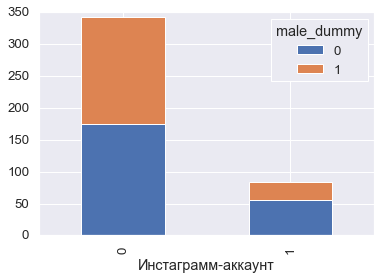

In [432]:
tab = pd.crosstab(df.instagram_dummy, df.male_dummy)

tab.plot(kind="bar", stacked=True)
plt.xlabel('Инстаграмм-аккаунт')

Правда ли, что девушки чаще указывают наличие инстаграмма на своей страничке?

__Ответ:__ По диаграмме, получается, что правда, у девушек чаще есть инстаграмм.  

#### Задание 16 [1]

Категориальная переменная обычно принимает значения из какого-то фиксированного множества. Например, переменная `political_cat` описывает к какой категории относятся политические взгляды юзера. Постройте для этой переменной столбиковую диаграмму. Разбиритесь по [документации](http://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) как сделать у столбиков горизонтальное расположение. Можно ли сделать исходя из картинки вывод, что в вышке одни либералы? Почему? 

__Ответ:__ Нельзя, большинство значений пустые

<AxesSubplot:xlabel='count', ylabel='political_cat'>

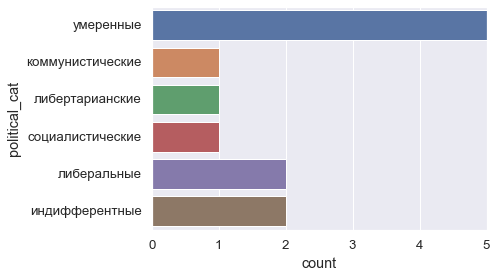

In [425]:
sns.countplot(y="political_cat", data=df)

In [419]:
len(df.political_cat)

425

#### Задание 17 [1]

Как политические взгляды распределены по полам?  Постройте для этого также столбиковую диаграмму, на которой каждый стобик будет разбит на два цвета: мужчины и женщины. 

__Ответ:__ Либертарианцы и социалисты только мужчины, а коммунисты только женщины. 

Text(0.5, 0, 'Политические взгляды')

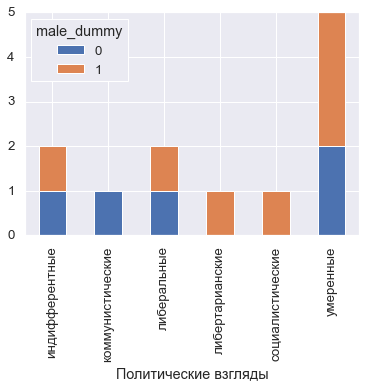

In [431]:
tab = pd.crosstab(df.political_cat, df.male_dummy)

tab.plot(kind="bar", stacked=True)
plt.xlabel('Политические взгляды')

#### Задание 18 [2]

Есть ли связь между неграмотностью и рождаемостью? Для 94 стран, уровень неграмотности женщин в которых больше 5%, известны доля неграмотных среди женщин старше 15 (на 2003 год) и средняя рождаемость на одну женщину (на 2005 год).

illiteracy.txt - датасет

Чему равен выборочный коэффициент корреляции Пирсона между этими двумя признаками? Округлите до четырёх знаков после десятичной точки.

In [442]:
from scipy import stats

countries_df = pd.read_csv('./illiteracy.txt', sep='\t')

illit = countries_df['Illit']
birth = countries_df['Births']

In [443]:
pearson = stats.pearsonr(illit, birth)[0]
round(pearson, 4)

0.7687

Чему равен выборочный коэффициент корреляции Спирмена признаков из предыдущего вопроса? Округлите до четырёх знаков после десятичной точки.

In [444]:
spearman = stats.spearmanr(illit, birth).correlation
round(spearman, 4)

0.753